In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#### Funciones utilizadas en los cálculos

In [2]:
def fisher(xi:pd.Series,ni:pd.Series) -> float:
    '''Función encargada de cálcular el coeficiente
    de Fisher'''
    sumatoria = 0
    x = xi.mean()
    s_cubo = xi.std()**3
    n = xi.count()
    for i in range(n):
        sumatoria += ni.iloc[i] * (xi.iloc[i]-x)**3
    return sumatoria / (n*s_cubo)


def identificar_outliers(dato, serie_datos:pd.Series) -> bool:
    '''Función encargada de indetificar si un dato es un
    outlier'''
    q1 = serie_datos.loc['25%'] #Cuartil 1
    q3 = serie_datos.loc['75%'] #Cuartil 2
    iqr = q3-q1 #Rango intercuartílico
    min = q1-(1.5*iqr)
    max = q3+(1.5*iqr)
    if dato<min or dato>max:
        return True
    else:
        return False


def curtosis(xi:pd.Series, ni:pd.Series)->float:
    '''Función encargada de cálcular el coeficiente
    de curtosis'''
    sumatoria = 0
    x = xi.mean()
    s_4 = xi.std()**4
    n = xi.count()
    for i in range(n):
        sumatoria += (ni.iloc[i]/n)*(xi.iloc[i]-x)**4
    return (sumatoria/s_4)-3


def graficar_datos(datos:pd.Series, ni:pd.Series, ancho:float)->None:
    '''Función encargada de graficar los datos'''
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,8))
    ax[0].bar(datos, ni, width=ancho)
    ax[0].vlines(x=datos.mean(), ymin=0, ymax=ni.max(), color='red', linestyle='--', label='Media ({0:.3f})'.format(datos.mean()))
    ax[0].vlines(x=datos.median(), ymin=0, ymax=ni.max(), color='blue', linestyle='--', label='Mediana ({0:0.3f})'.format(datos.median()))
    ax[0].grid()
    ax[0].legend(loc='upper left')
    ax[1].boxplot(datos, vert=False)
    plt.show()

### **Coeficiente de asimetría de Fisher y coeficiente de curtosis**

**Ejercicio 1:** Con los siguientes datos: 

13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465

calcular: la media, varianza, desviación típica y los coeficientes de asimetría de Fisher y coeficiente de Curtosis

**Solución**

In [3]:
datos = pd.Series([13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465])

In [4]:
#Cálculo de la media
datos.mean()

13.448000000000002

In [5]:
#Cálculo de la varianza
datos.var()

0.00025640000000000325

In [6]:
#Cálculo de la desviación típica
datos.std()

0.016012495120998577

In [7]:
#Tabla de frecuencias
tabla1_df = pd.DataFrame(datos, columns=['Datos'])
tabla1_df['ni'] = [1,1,2,1,1,1,2,3,1,2,1]
tabla1_df['fi'] = tabla1_df.ni/tabla1_df.ni.count()
tabla1_df

,Datos,ni,fi
0,13.404,1,0.090909
1,13.443,1,0.090909
2,13.445,2,0.181818
3,13.447,1,0.090909
4,13.449,1,0.090909
5,13.450,1,0.090909
6,13.453,2,0.181818
7,13.455,3,0.272727
8,13.457,1,0.090909
9,13.460,2,0.181818


In [8]:
#Calculando el coeficiente de fisher 
fisher(tabla1_df.Datos, tabla1_df.ni)

-1.6602142424981243

In [9]:
#Calculando el coeficiente de curtosis
curtosis(tabla1_df.Datos, tabla1_df.ni)

2.3777293624727243

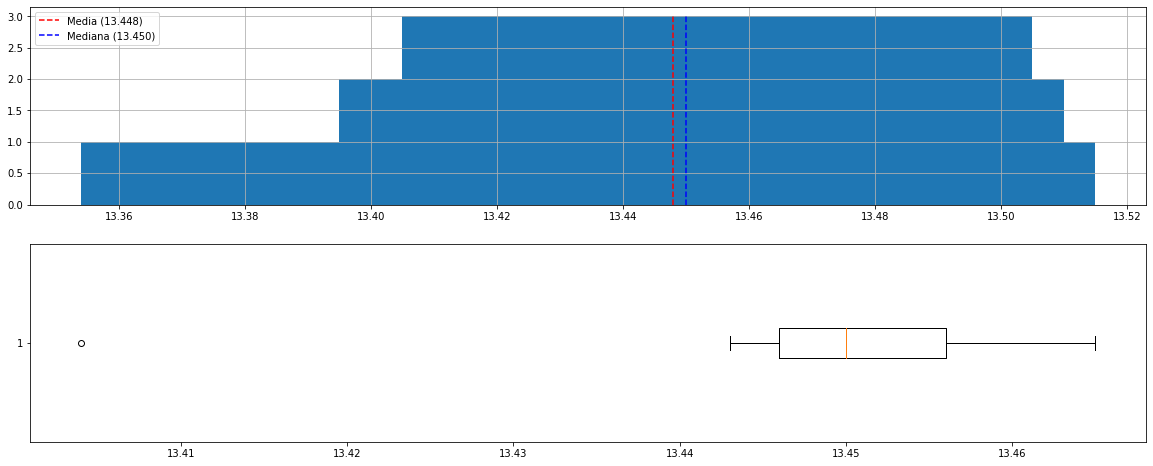

In [10]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
graficar_datos(tabla1_df.Datos, tabla1_df.ni, ancho=0.1)

In [11]:
#Identificando los valores que son outliers
tabla1_df['Outlier'] = tabla1_df.Datos.apply(identificar_outliers, args=(tabla1_df.Datos.describe(),))
tabla1_df

,Datos,ni,fi,Outlier
0,13.404,1,0.090909,True
1,13.443,1,0.090909,False
2,13.445,2,0.181818,False
3,13.447,1,0.090909,False
4,13.449,1,0.090909,False
5,13.450,1,0.090909,False
6,13.453,2,0.181818,False
7,13.455,3,0.272727,False
8,13.457,1,0.090909,False
9,13.460,2,0.181818,False


Eliminando los outliers para comparar los cálculos

In [12]:
sin_outliers1_df = tabla1_df.drop(tabla1_df[tabla1_df.Outlier].index)
sin_outliers1_df

,Datos,ni,fi,Outlier
1,13.443,1,0.090909,False
2,13.445,2,0.181818,False
3,13.447,1,0.090909,False
4,13.449,1,0.090909,False
5,13.450,1,0.090909,False
6,13.453,2,0.181818,False
7,13.455,3,0.272727,False
8,13.457,1,0.090909,False
9,13.460,2,0.181818,False
10,13.465,1,0.090909,False


In [13]:
#Cálculo de la media
sin_outliers1_df.Datos.mean()

13.4524

In [14]:
#Cálculo de la varianza
sin_outliers1_df.Datos.var()

4.826666666667025e-05

In [15]:
#Cálculo de la desviación típica
sin_outliers1_df.Datos.std()

0.006947421584060539

In [16]:
#Tabla de frecuencias
sin_outliers1_df['fi'] = sin_outliers1_df.ni/sin_outliers1_df.ni.count()
sin_outliers1_df

,Datos,ni,fi,Outlier
1,13.443,1,0.1,False
2,13.445,2,0.2,False
3,13.447,1,0.1,False
4,13.449,1,0.1,False
5,13.450,1,0.1,False
6,13.453,2,0.2,False
7,13.455,3,0.3,False
8,13.457,1,0.1,False
9,13.460,2,0.2,False
10,13.465,1,0.1,False


In [17]:
#Calculando el valor de fisher
fisher(sin_outliers1_df.Datos, sin_outliers1_df.ni)

0.35105833822380555

In [18]:
#Calculando el coeficiente de curtosis
curtosis(sin_outliers1_df.Datos, sin_outliers1_df.ni)

-0.9703490430698336

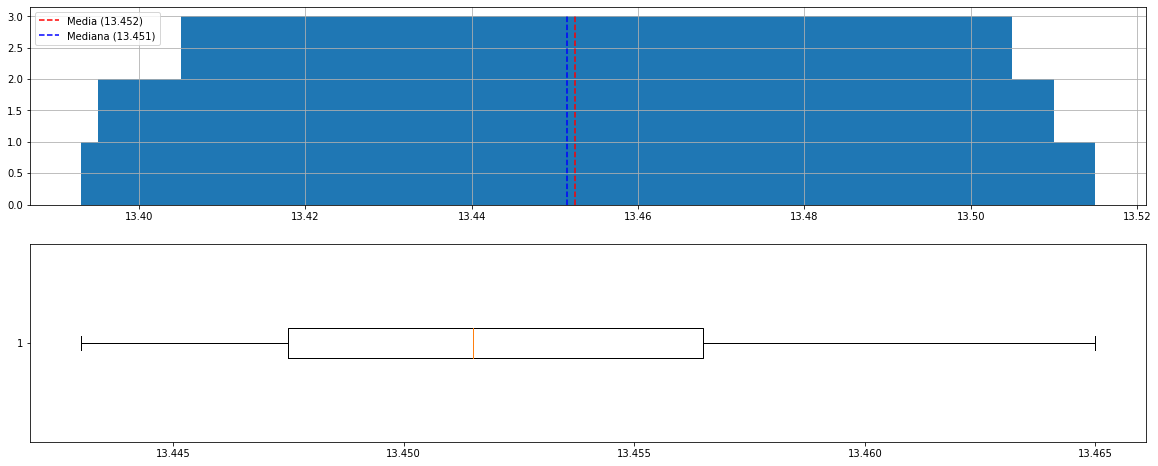

In [19]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
graficar_datos(sin_outliers1_df.Datos, sin_outliers1_df.ni, ancho=0.1)

**Ejercicio 2:** Con los datos del archivo ejercicio2.csv calcular: la media, varianza, 
desviación típica, el coeficientes de asimetría de Fisher y el coeficiente de Curtosis

**Solución**

In [20]:
#Cargando los datos
ejer2_df = pd.read_csv('datos\\ejercicio2.csv')
ejer2_df.head()

,Datos
0,91
1,57
2,71
3,27
4,3


In [21]:
#Cálculo de la media
ejer2_df.Datos.mean()

49.39

In [22]:
#Encontrando la mediana
ejer2_df.Datos.median()

49.5

In [23]:
#Cálculo de la varianza()
ejer2_df.Datos.var()

990.8867676767677

In [24]:
#Cálculo de la desviación estandar
ejer2_df.Datos.std()

31.47835395437264

In [25]:
#Tabla de frecuencias
tabla2_df = ejer2_df.Datos.value_counts()
tabla2_df = tabla2_df.reset_index()
tabla2_df = tabla2_df.rename(columns={'index':'datos', 'Datos':'ni'})
print(tabla2_df.index)
tabla2_df.head()

RangeIndex(start=0, stop=67, step=1)


,datos,ni
0,56,4
1,48,4
2,25,4
3,74,3
4,38,3


In [26]:
#Calculando el coeficiente de fisher 
fisher(tabla2_df.datos, tabla2_df.ni)

-0.08664275832143374

In [27]:
#Calculando el coeficiente de curtosis
curtosis(tabla2_df.datos, tabla2_df.ni)

-0.6163149845469214

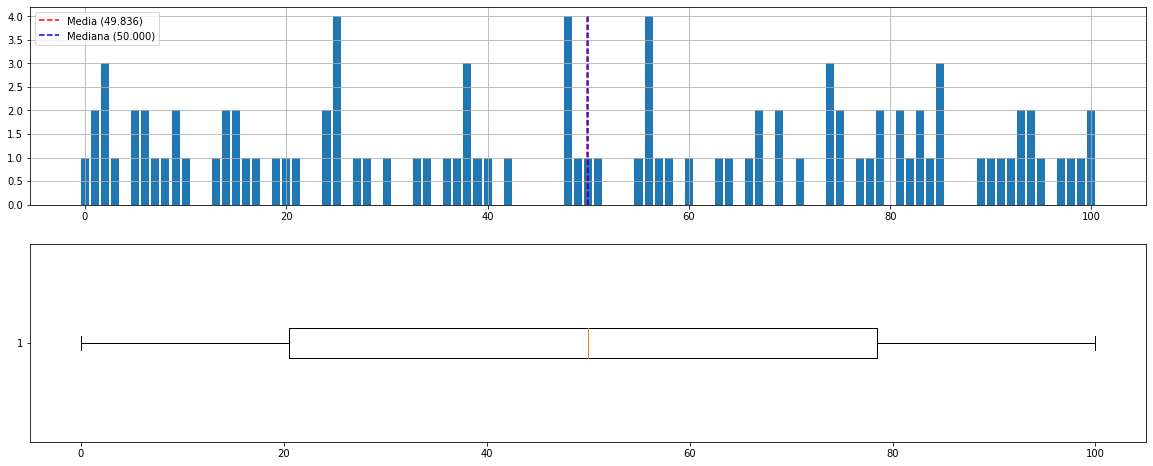

In [28]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
graficar_datos(tabla2_df.datos, tabla2_df.ni, ancho=0.8)

**Ejercicio 3:** Con los datos del archivo ejercicio3.csv calcular: la media, varianza, desviación típica, el coeficientes de asimetría de Fisher y el coeficiente de Curtosis

**Solución**

In [29]:
#Cargando los datos
ejer3_df = pd.read_csv('datos\\ejercicio3.csv')
ejer3_df.head()

,datos
0,32
1,67
2,58
3,27
4,93


In [30]:
#Cálculo de la media
ejer3_df.datos.mean()

58.58

In [31]:
#Encontrando la mediana
ejer3_df.datos.median()

51.0

In [32]:
#Encontrando la varianza
ejer3_df.datos.var()

2604.9733333333334

In [33]:
#Cálcula de la desviación estandar
ejer3_df.datos.std()

51.03893938291952

In [34]:
#Tabla de frecuencias 
tabla3_df = ejer3_df.value_counts()
tabla3_df = tabla3_df.reset_index()
tabla3_df = tabla3_df.rename(columns={0:'ni'})
tabla3_df.head()

,datos,ni
0,41,5
1,27,4
2,82,3
3,60,3
4,57,3


In [35]:
#Calculando el coeficiente de Fisher
fisher(tabla3_df.datos, tabla3_df.ni)

3.0348930628309034

In [36]:
#Calculando el coeficiente de curtosis
curtosis(tabla3_df.datos, tabla3_df.ni)

11.360882308561173

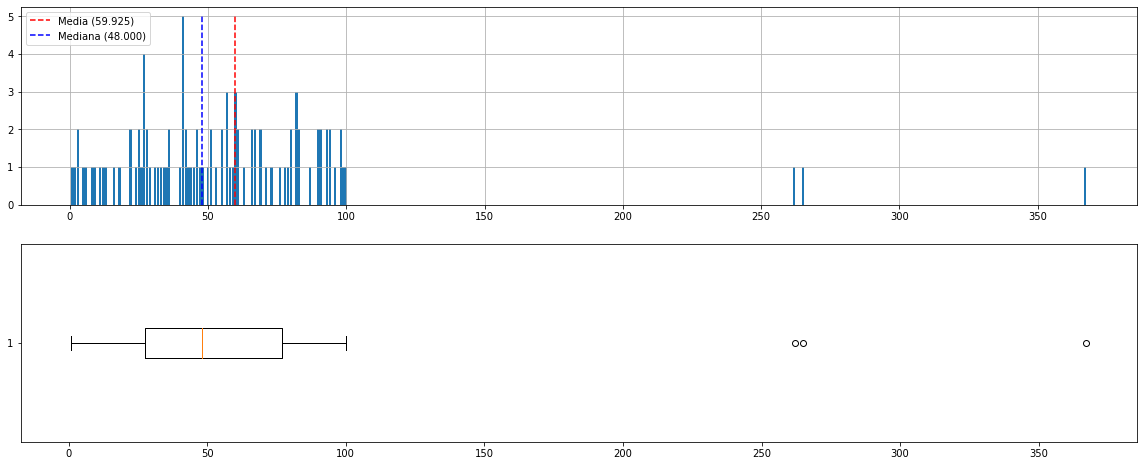

In [37]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
graficar_datos(tabla3_df.datos, tabla3_df.ni, ancho=0.8)

In [38]:
#Identificando los valores que son outliers
tabla3_df['outlier'] = tabla3_df.datos.apply(identificar_outliers, args=(tabla3_df.datos.describe(),))
tabla3_df

,datos,ni,outlier
0,41,5,False
1,27,4,False
2,82,3,False
3,60,3,False
4,57,3,False
...,...,...,...
62,45,1,False
63,47,1,False
64,2,1,False
65,50,1,False


In [39]:
#Eliminando los outliers para comparar los cálculos
sin_outliers3_df = tabla3_df.drop(tabla3_df[tabla3_df.outlier].index)
sin_outliers3_df

,datos,ni,outlier
0,41,5,False
1,27,4,False
2,82,3,False
3,60,3,False
4,57,3,False
...,...,...,...
61,44,1,False
62,45,1,False
63,47,1,False
64,2,1,False


In [40]:
#Cálculo de la media
sin_outliers3_df.datos.mean()

48.765625

In [41]:
#Cálculo de la varianza
sin_outliers3_df.datos.var()

832.563244047619

In [42]:
#Cálculo de la desviación típica
sin_outliers3_df.datos.std()

28.854172038851143

In [43]:
#Calculando el valor de fisher
fisher(sin_outliers3_df.datos, sin_outliers3_df.ni)

0.4012916653301405

In [44]:
#Calculando el coeficiente de curtosis
curtosis(sin_outliers3_df.datos, sin_outliers3_df.ni)

-0.4090169297957873

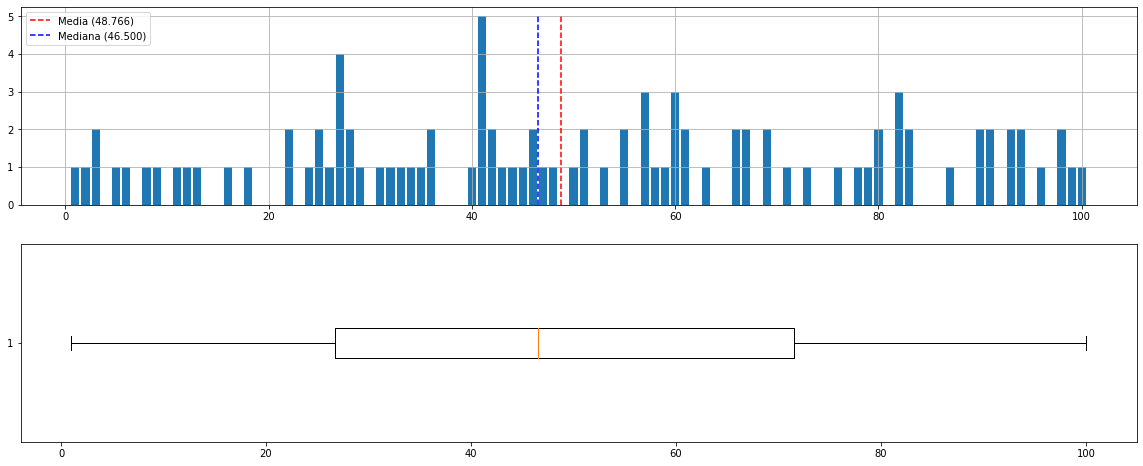

In [45]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
graficar_datos(sin_outliers3_df.datos, sin_outliers3_df.ni, ancho=0.8)